# Lab 1 Inroduction



This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [8]:
!pip install numpy opencv-python IPython matplotlib


  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_12_0_x86_64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.9 MB/s eta 0:00:0000:0100:01


Let's import all the necessary packages:

In [19]:
# %matplotlib inline is a magic function for displaying the image in the notebook


%matplotlib inline

import numpy as np
import cv2
import copy
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from IPython.display import display, Image


## Task 1. Basic loading and displaying

This is an unassessed task to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Introduction to Python Workshop](https://monashdatafluency.github.io/python-workshop-base/) github tutorial which provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint 1: images in python can be though of as a multidimentional array`
`Hint 2: Use OpenCV to load the image`

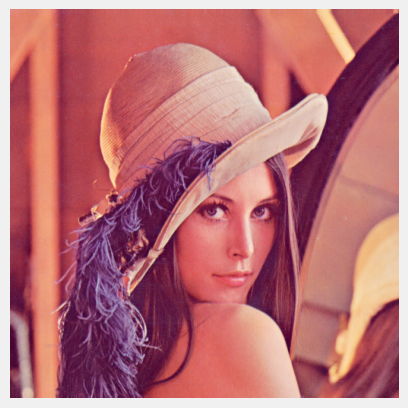

In [88]:
# fill in missing part
#img = np.empty((100,100,3)) # replace this code and load your image

img = cv2.imread('/Users/xiedongyang/comp0241_24/dataset/Lenna.png')  # 请确保图片路径正确
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将图像从BGR转换为RGB格式

# 显示图像
plt.imshow(img)
plt.axis('off')  # 隐藏坐标轴
plt.show()

# display the image (Hint: use plt.imshow)


Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

In [21]:
print("Image shape:", img.shape) 

# Play with the images here 

Image shape: (512, 512, 3)


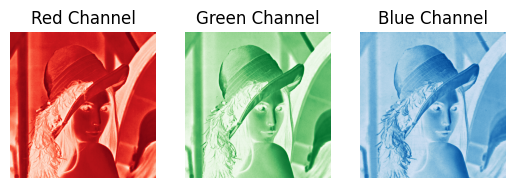

In [12]:
# 分离图像的 RGB 通道
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# 显示 R 通道
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# 显示 G 通道
plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# 显示 B 通道
plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()


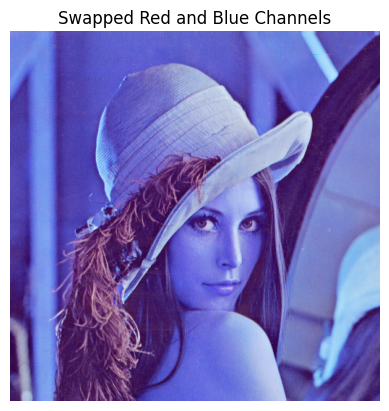

In [13]:
# 交换 R 和 B 通道
swapped_img = img.copy()
swapped_img[:, :, 0], swapped_img[:, :, 2] = img[:, :, 2], img[:, :, 0]

# 显示交换通道后的图像
plt.imshow(swapped_img)
plt.title('Swapped Red and Blue Channels')
plt.axis('off')
plt.show()


### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

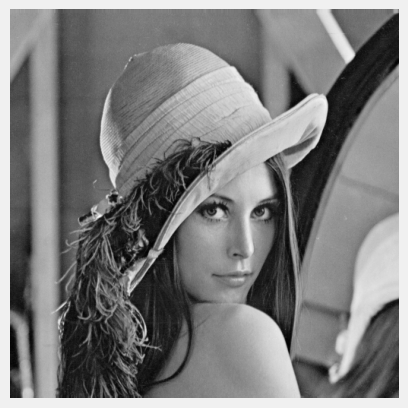

In [89]:
#gray_img = np.empty((100,100,3)) # replace this code and load your image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转换为灰度图像
plt.imshow(gray_img, cmap='gray')  # 使用灰度色彩映射显示图像
plt.axis('off')
plt.show()


# display the image (Hint: use plt.imshow)

Try writing your oen method to convert RGB images to gray scale.

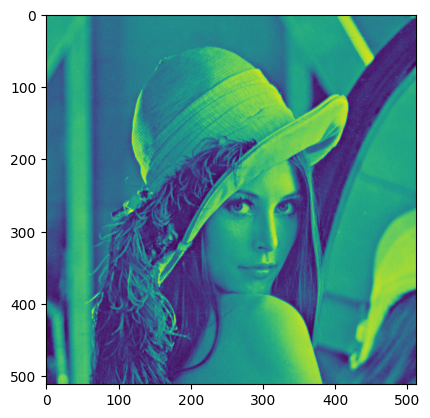

In [18]:
def to_gray(img):
    '''
    Convert an RGB image into gray scale.
    :param img: RGB image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    # 检查输入图像的尺寸是否符合 RGB 图像的格式
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    
    # 获取图像的高度和宽度
    h, w, c = img.shape
    
    # 确保输入图像具有3个通道（RGB）
    assert c == 3, 'Input image must have 3 channels (RGB)'
    
    # 使用加权平均公式将 RGB 图像转换为灰度图像
    gray_img = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    
    # 转换后的灰度图像应该是 HxW 的二维数组
    assert gray_img.shape == (h, w), 'Wrong spatial dimensions, your method should only change the channel dimension'
    
    # 返回灰度图像，并将其像素值转换为 uint8 类型
    return gray_img.astype(np.uint8)
    plt.imshow(gray_img)

##  Task 2. Basic loading and displayingMore advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

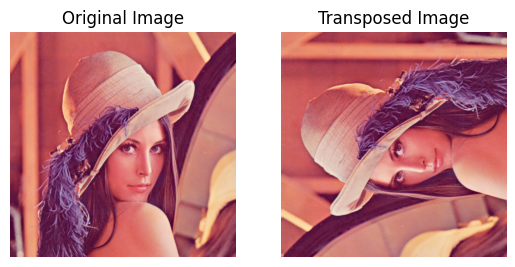

In [21]:
# replace this code and load your image
transposed_img = img.transpose(1, 0, 2)  # 将 HxWx3 转换为 WxHx3，实现沿对角线翻转

# 显示原始图像和转置后的图像
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transposed_img)
plt.title('Transposed Image')
plt.axis('off')

plt.show()
# display the transposed_img (Hint: use plt.imshow)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

`Hint: Do not use for loop, try NumPy array slicing. Be carefull of the coordinate system!`

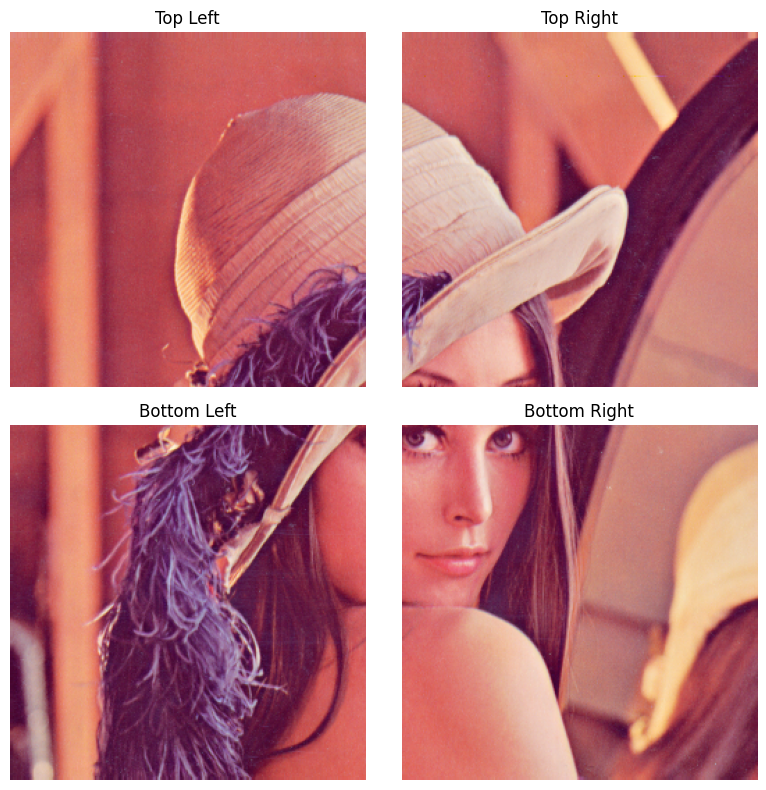

In [22]:

# 获取图像的高度和宽度
height, width, _ = img.shape

# 计算中心点
center_y, center_x = height // 2, width // 2

# 使用 NumPy 数组切片分割图像为四个区域
top_left = img[:center_y, :center_x]        # 左上部分
top_right = img[:center_y, center_x:]       # 右上部分
bottom_left = img[center_y:, :center_x]     # 左下部分
bottom_right = img[center_y:, center_x:]    # 右下部分

# 使用 subplots 显示四个部分
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# 显示每个部分
axs[0, 0].imshow(top_left)
axs[0, 0].set_title("Top Left")
axs[0, 0].axis('off')

axs[0, 1].imshow(top_right)
axs[0, 1].set_title("Top Right")
axs[0, 1].axis('off')

axs[1, 0].imshow(bottom_left)
axs[1, 0].set_title("Bottom Left")
axs[1, 0].axis('off')

axs[1, 1].imshow(bottom_right)
axs[1, 1].set_title("Bottom Right")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()




# display all parts

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

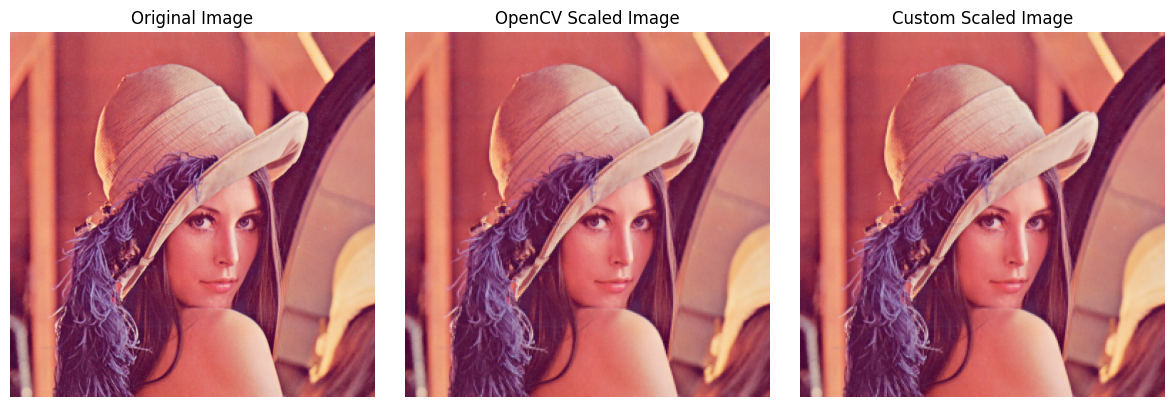

In [11]:
def opencv_resize(img, scale=0.5):
    height, width = img.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

# 自定义缩小函数，通过每 2x2 像素块的平均值来缩小图像
def custom_scale_down(img):
    # 获取图像的高度和宽度
    height, width, channels = img.shape
    # 确保高度和宽度是偶数，以便可以分割为 2x2 块
    assert height % 2 == 0 and width % 2 == 0, "Height and width must be even for this method."

    # 初始化新图像（尺寸减半）
    new_img = np.zeros((height // 2, width // 2, channels), dtype=np.uint8)

    # 遍历每个 2x2 像素块
    for y in range(0, height, 2):
        for x in range(0, width, 2):
            # 获取 2x2 区域的 4 个像素并计算平均值
            block = img[y:y+2, x:x+2]
            new_img[y//2, x//2] = block.mean(axis=(0, 1))
    
    return new_img

# 使用 OpenCV 缩小图像
opencv_scaled_img = opencv_resize(img, scale=0.5)

# 使用自定义方法缩小图像
custom_scaled_img = custom_scale_down(img)

# 显示原始图像和缩小图像
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(opencv_scaled_img)
plt.title("OpenCV Scaled Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(custom_scaled_img)
plt.title("Custom Scaled Image")
plt.axis("off")

plt.tight_layout()
plt.show()
# display original image

# display scaled down image

In [9]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    scaled_img = img # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

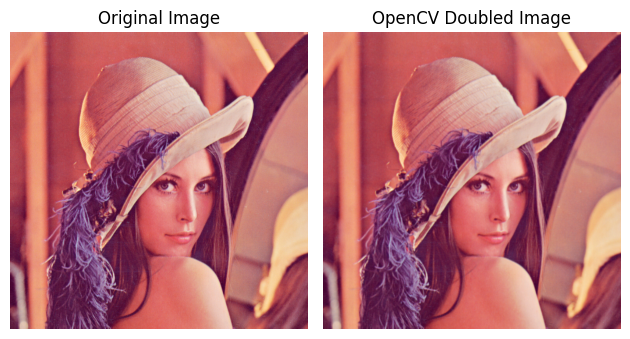

In [12]:
opencv_scaled_img = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2), interpolation=cv2.INTER_LINEAR)

# 显示原始图像和放大后的图像
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(opencv_scaled_img)
plt.title("OpenCV Doubled Image")
plt.axis("off")

plt.tight_layout()
plt.show()

##  Task 3: Image Histograms


In [10]:
import numpy as np
import copy
import cv2
import matplotlib
from matplotlib import pyplot as plt
import random
import copy
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('fivethirtyeight')

### 3.1: Compute Histogram
Histograms can be rather important when it comes to adjusting the brightness of an image.
Your first task is to compute a histogram of an image of your choice and display this as a plot.

*Note: Do not use any libraries, write your own function*

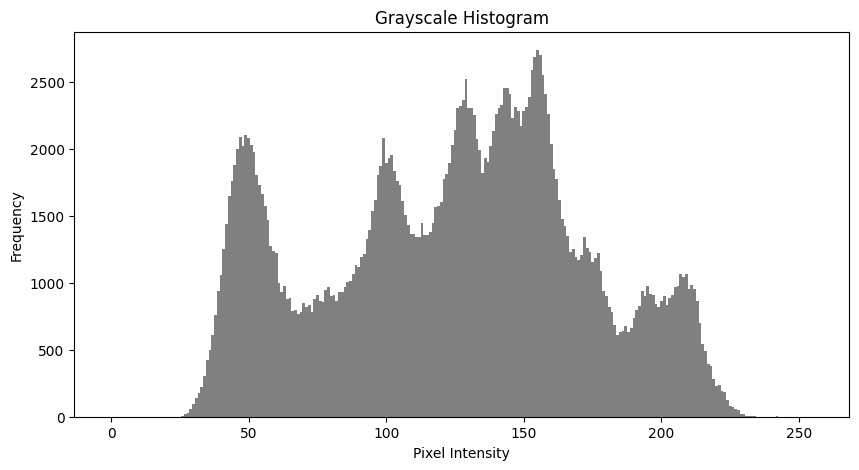

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_hist(img):
    '''
    Implement a function to compute the histogram of a grayscale image.
    :param img: grayscale image with size HxW
    :return histogram array: an array of size 256 representing pixel intensity frequencies
    '''
    # 初始化直方图数组，长度为 256
    histogram = [0] * 256
    
    # 遍历每个像素值（0-255），使用 np.count_nonzero 计算出现次数
    for i in range(256):
        histogram[i] = np.count_nonzero(img == i)
    
    return histogram

# 加载并转换图像为灰度图像
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # 替换为你的图像路径

# 计算直方图
histogram = compute_hist(gray_img)

# 绘制直方图
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram, width=1, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


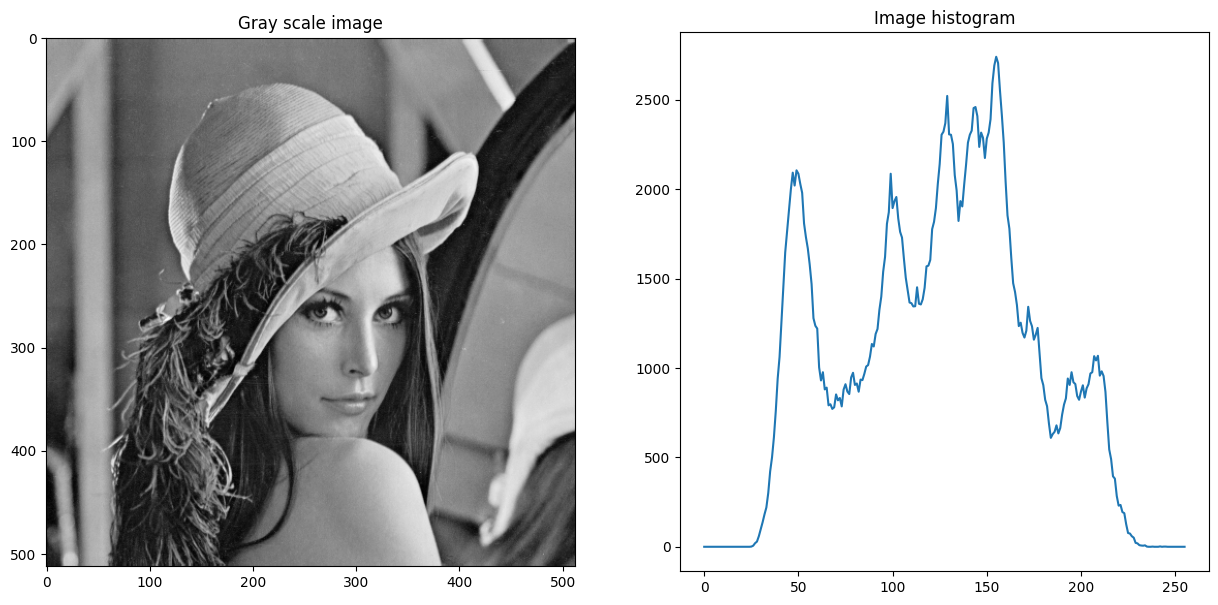

In [24]:
img = cv2.imread('../dataset/Lenna.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

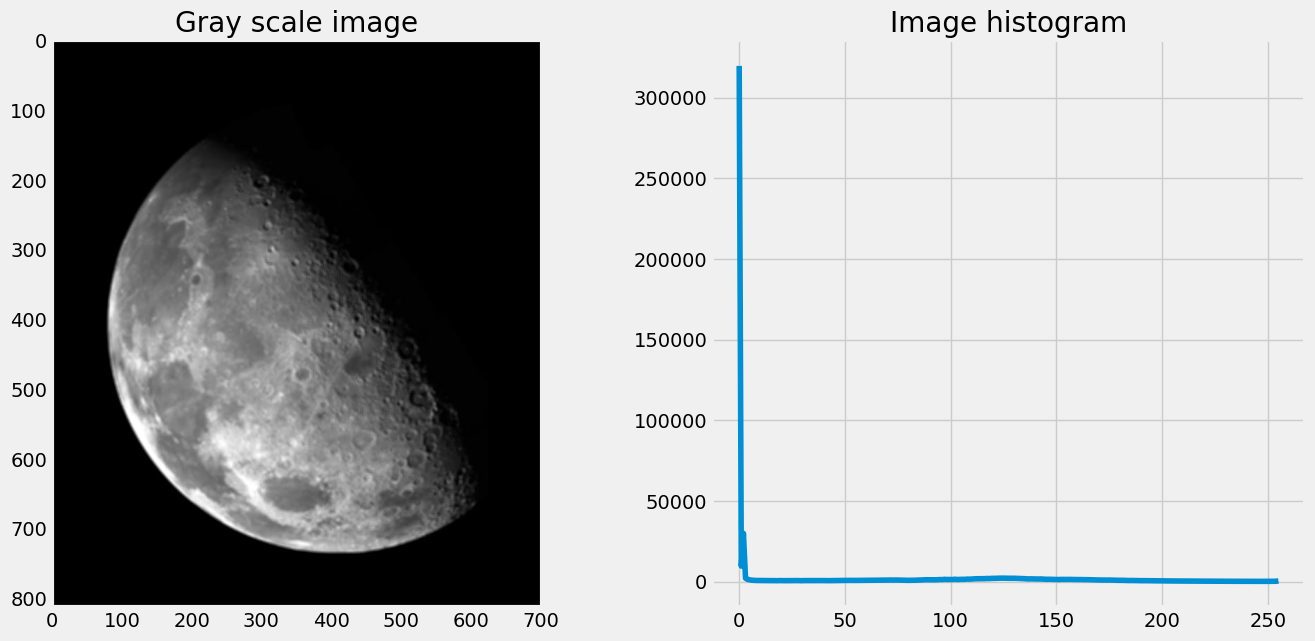

In [33]:
img = cv2.imread('../dataset/Moon.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

Why is there such a differece between Lenna and Moon on the histogram?

## Task 4: Histogram Equalisation
Histogram Equalisation is often used to adjust the global contrast of an image.
It is most useful when an image’s background is either too dark or too light and can bring out more detail in under exposed images.

This can be done by finding a mapping function $F: [0, 255] \rightarrow [0, 255]$:

$$
    F(v) = \frac{cdf(v) - cdf_{min}}{(M \times N) - cdf_{min}}\times(L - 1)
$$

Where $v$ is the current value to be adjusted, $(M \times N)$ is the size of the image and $L$ is the number of intensity levels i.e. 256. The cdf is the cumulative distribution of the histogram.

**Hint: this is essentially equivalent to do histgram mathcing with a source CDF as straight line.**

Your task would be to calculate the new mappings, apply this to the image and plot the new equalised histogram. As shown below:

In [30]:


def hist_equalisation(img, img_hist, L=256):
    '''
    Implement histogram equalisation.
    :param img: grayscale image with size HxW
    :param img_hist: histogram array of size [256]
    :param L: number of intensity levels (default is 256 for 8-bit images)
    :return: equalised image of size HxW
    '''
    # 计算累计分布函数（CDF）
    cdf = np.cumsum(img_hist)  # 使用 np.cumsum 计算累计分布
    cdf_min = cdf[np.nonzero(cdf)].min()  # 排除零元素，找到第一个非零的 CDF 值
    M, N = img.shape  # 获取图像大小
    
    # 计算映射函数 F(v)
    equalisation_map = ((cdf - cdf_min) / ((M * N) - cdf_min)) * (L - 1)
    equalisation_map = equalisation_map.astype(np.uint8)  # 映射到 [0, 255]
    
    # 应用映射到图像
    equalised_img = equalisation_map[img]
    
    return equalised_img

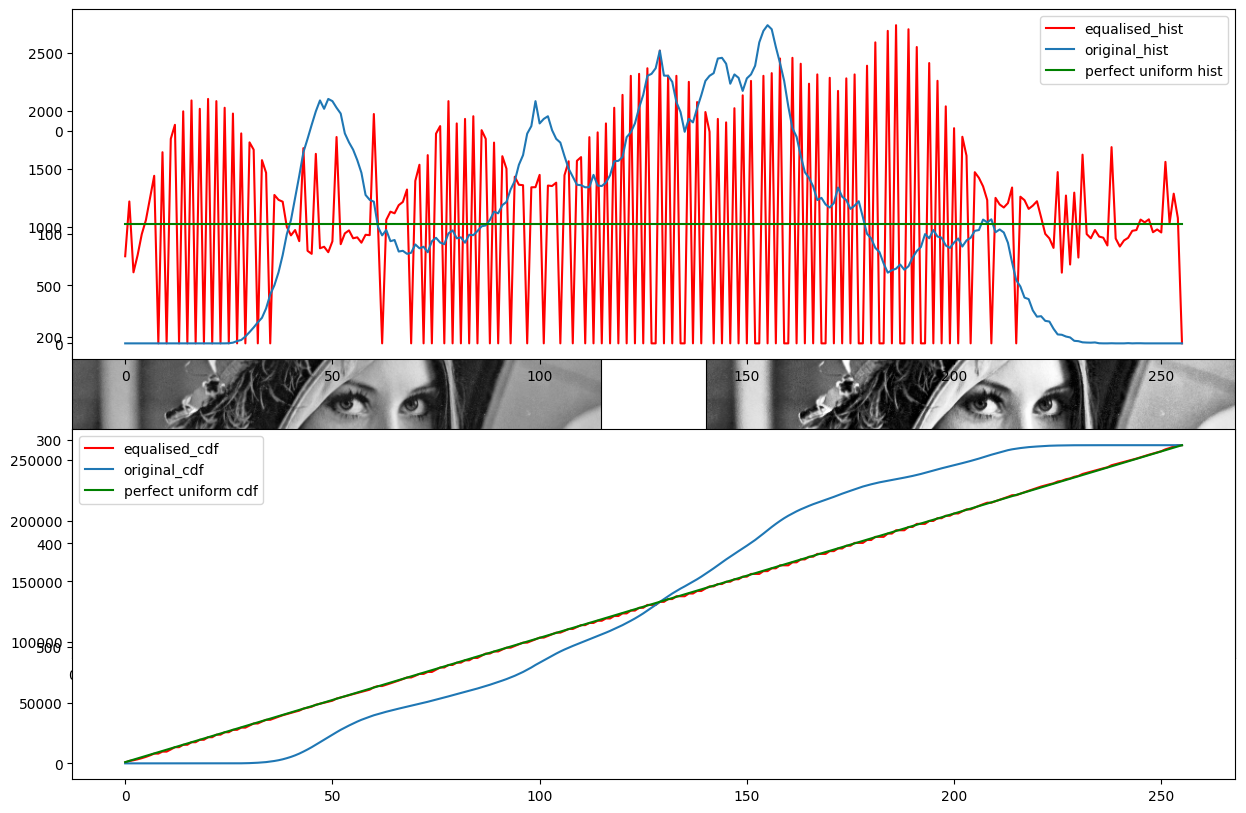

In [31]:
img_cdf = np.cumsum(img_hist)
h, w = gray_img.shape
uni_hist = np.ones(256,) * h * w / 256
uni_cdf = np.cumsum(uni_hist)
eqImg = hist_equalisation(gray_img, img_hist)
eqImg_hist = compute_hist(eqImg.astype(int))
eqImg_cdf = np.cumsum(eqImg_hist)

# Plot Original and Equalised image
plt.figure(figsize=(15,10))

plt.subplot(1,2, 1)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(eqImg, 'gray')
plt.grid(False)
plt.title('Equalized Image')

plt.subplot(2, 1, 1)
plt.plot(eqImg_hist, color='red', label='equalised_hist')
plt.plot(img_hist, label='original_hist')
plt.plot(uni_hist, color="green", label='perfect uniform hist')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(eqImg_cdf, color="red", label="equalised_cdf")
plt.plot(img_cdf, label="original_cdf")
plt.plot(uni_cdf, color="green", label='perfect uniform cdf')
plt.legend()

plt.show()

## Task 5: Histogram Matching

Your next task is to be able to adjust an image based on the histogram of another.
This is done using histogram matching and can be helpful if you would like to adjust a series of images with different global illuminations. Using histogram matching you could adjust this image’s brightness (and contrast) to match the other better illuminated images.

To perform histogram matching we need to first calculate the normalised CDF of the **source image** and the **target image**: `cdfSource` and `cdfTarget`.

The normalised CDF for each image is obtained by dividing the value in each bin of the original CDF with the maximum value of the original CDF (last bin of the original CDF), so we get a value between 0 and 1 in each bin of the normalised CDF.

We then need to find a mapping function `F` that maps `cdfSource` to `cdfTarget`. This mapping function can then be applied to the input image. The mapping function needed is quite simple and can be obtained by comparing the values between cdfSource and cdfTarget. One way to do this, is to find the first `cdfSource(valueS)` that is greater than `cdfTarget(valueT)`, and that valueT will be the mapping `F(valueS)`. The figure below is a demonstration on how this mapping function works:

<img src="../images/histogram-cdf.png" alt="drawing" width="700"/>

In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_hist(img):
    """
    计算图像的灰度直方图
    :param img: 灰度图像
    :return: 灰度直方图
    """
    histogram = [0] * 256
    for value in img.ravel():
        histogram[value] += 1
    return histogram

def compute_cdf(hist):
    """
    计算归一化 CDF（累积分布函数）
    :param hist: 图像的直方图
    :return: 归一化 CDF
    """
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]  # 归一化到 [0, 1] 区间
    return cdf_normalized

def hist_match(source_img, target_img):
    """
    直方图匹配，将源图像的亮度和对比度调整为接近目标图像
    :param source_img: 灰度源图像
    :param target_img: 灰度目标图像
    :return: 匹配后的图像
    """
    # 计算源图像和目标图像的直方图和归一化 CDF
    source_hist = compute_hist(source_img)
    target_hist = compute_hist(target_img)
    cdfSource = compute_cdf(source_hist)
    cdfTarget = compute_cdf(target_hist)
    
    # 构建映射关系
    mapping = np.zeros(256, dtype=np.uint8)
    target_index = 0  # 用于跟踪目标 CDF 的位置
    for source_value in range(256):
        while target_index < 255 and cdfTarget[target_index] < cdfSource[source_value]:
            target_index += 1
        mapping[source_value] = target_index
    
    # 应用映射关系，将源图像转换为匹配后的图像
    matched_img = mapping[source_img]
    return matched_img, source_hist, target_hist

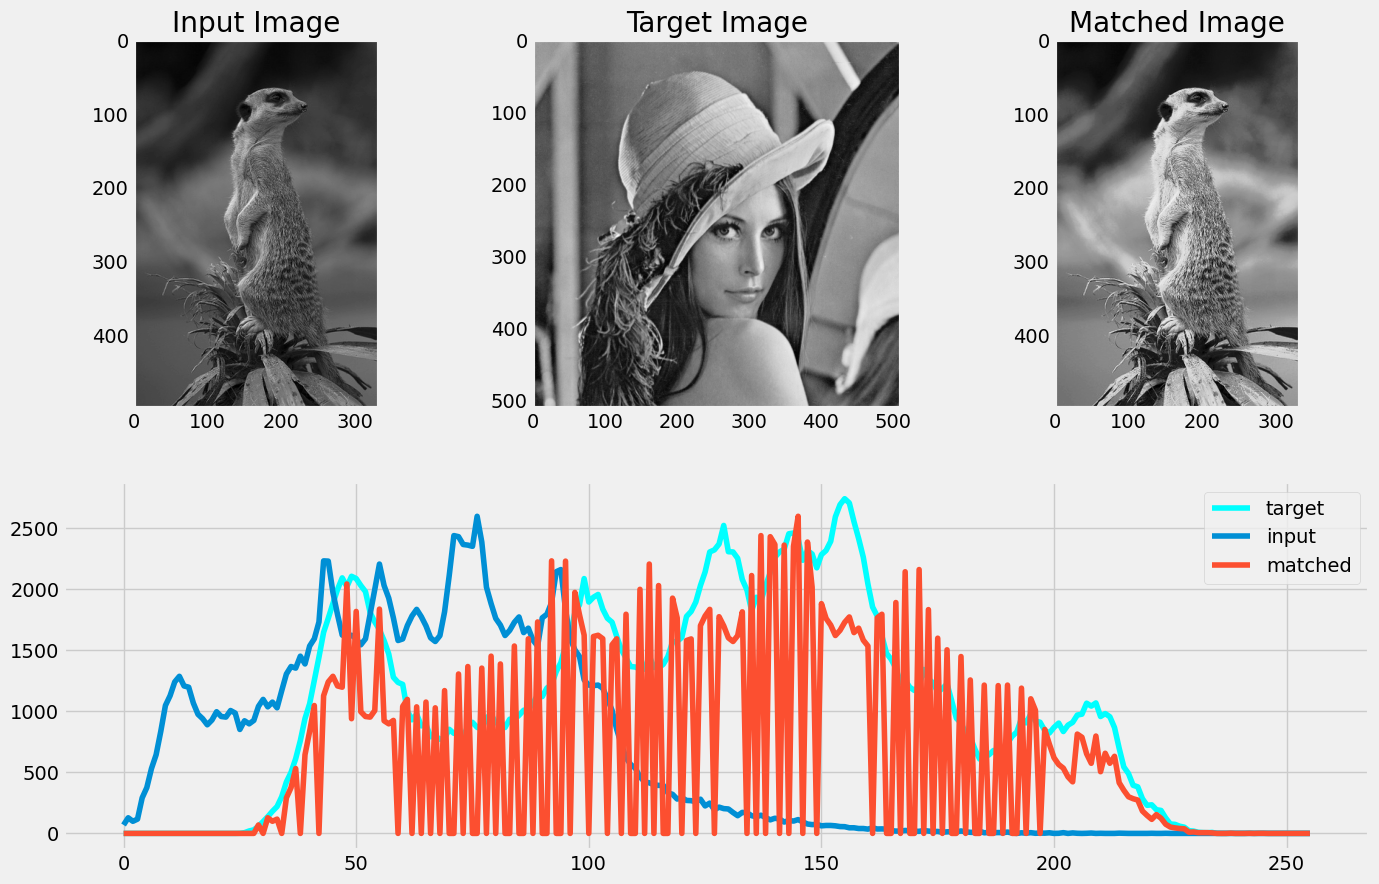

In [90]:
src_img = cv2.imread('../dataset/meerkat.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = gray_img
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()

# Task 6 Try with your webcam!
Capture some real image with your laptop webcam or other usb cameras and match their historgrams.
Try capture images under different ligthing conditions.

In [37]:
import uuid
import os

Webcam 0 opened. Press 'q' in the preview window to capture and save the image.
Image saved to captured_dataset\a58e5c3a.jpg


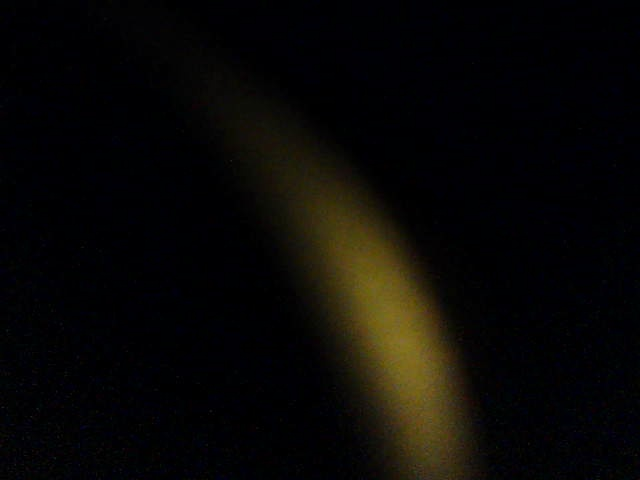

In [39]:
from IPython.display import display, Image


# Function to capture and preview an image from a webcam
def capture_webcam_image(cam_index=0, save_folder="captured_dataset"):
    # Ensure the save folder exists
    os.makedirs(save_folder, exist_ok=True)
    
    # Generate a short UUID for the filename
    short_uuid = str(uuid.uuid4())[:8]
    save_path = os.path.join(save_folder, f"{short_uuid}.jpg")
    
    # Open the webcam with the specified index
    cap = cv2.VideoCapture(cam_index)
    
    if not cap.isOpened():
        print(f"Cannot open webcam with index {cam_index}")
        return
    
    print(f"Webcam {cam_index} opened. Press 'q' in the preview window to capture and save the image.")
    
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image.")
            break
        
        # Display the frame in a preview window
        cv2.imshow("Webcam Preview", frame)
        
        # Wait for the user to press 'q' to capture
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Save the captured image
            cv2.imwrite(save_path, frame)
            print(f"Image saved to {save_path}")
            break

    # Release the webcam and close the window
    cap.release()
    cv2.destroyAllWindows()



    
    # Display the saved image in the Jupyter Notebook
    with open(save_path, "rb") as file:
        display(Image(data=file.read()))

        
    return short_uuid, save_path
# Call the function to preview and capture an image
short_uuid, save_path = capture_webcam_image(cam_index=0, save_folder="captured_dataset")


Image successfully read from captured_dataset/0a831e37.jpg


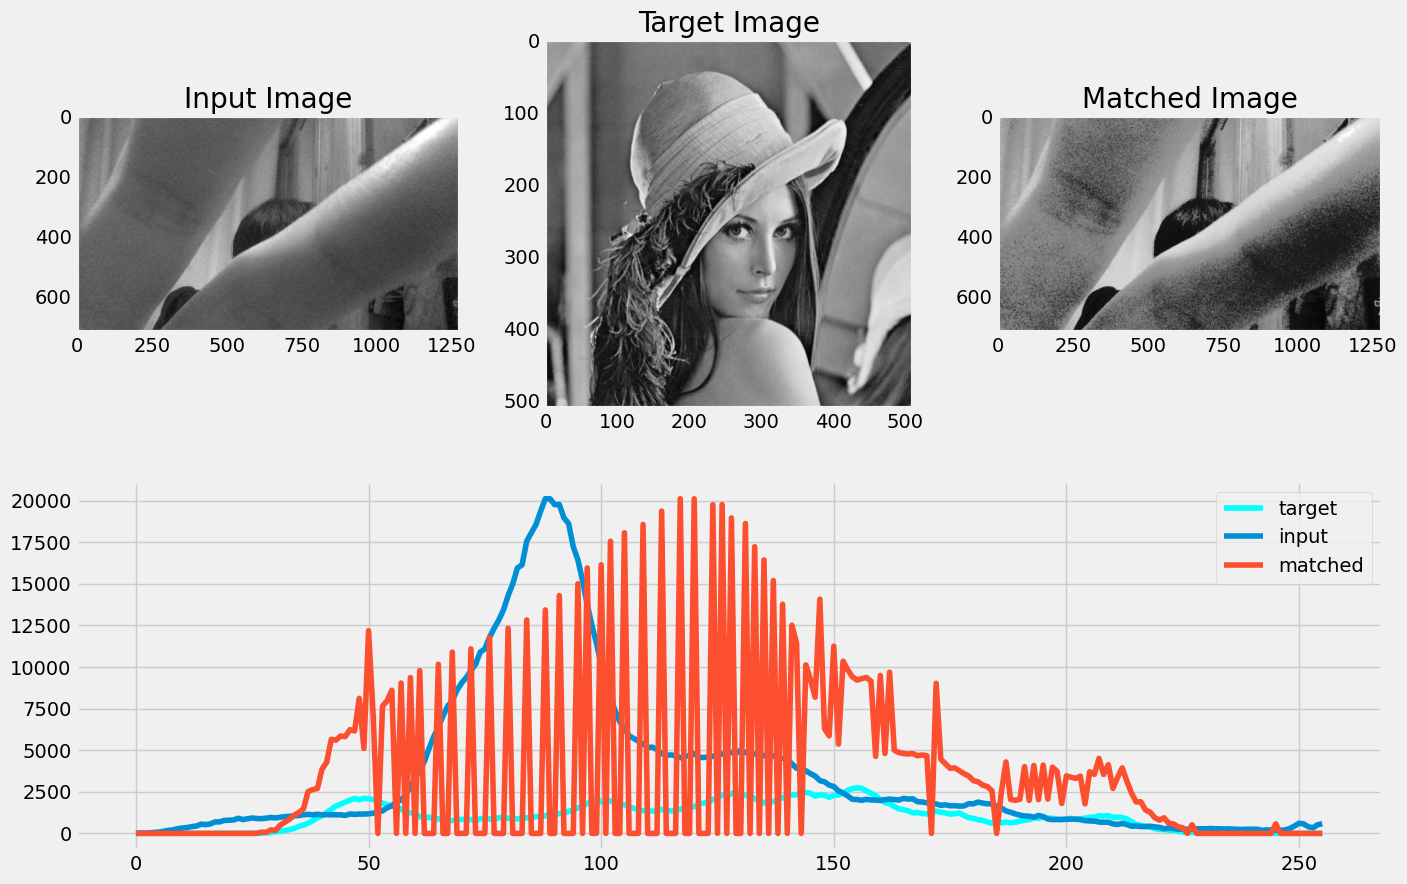

In [91]:
if short_uuid:
    src_img = cv2.imread(save_path)
    if src_img is not None:
        print(f"Image successfully read from {save_path}")
    else:
        print("Failed to read the saved image.")


# src_img = cv2.imread('./captured_dataset/9c69ba35.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = gray_img
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()